In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [3]:
train_df.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.2+ MB


In [5]:
train_df.describe()

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,26049.000000,26049.000000,2.604900e+04,26049.000000,26049.00000,26049.000000,26049.000000
mean,13024.000000,38.569235,1.903045e+05,10.088372,1087.68970,87.732734,40.443126
std,7519.842917,13.671489,1.059663e+05,2.567610,7388.85469,403.230205,12.361850
min,0.000000,17.000000,1.376900e+04,1.000000,0.00000,0.000000,1.000000
25%,6512.000000,28.000000,1.181080e+05,9.000000,0.00000,0.000000,40.000000
50%,13024.000000,37.000000,1.788660e+05,10.000000,0.00000,0.000000,40.000000
75%,19536.000000,48.000000,2.377350e+05,12.000000,0.00000,0.000000,45.000000
max,26048.000000,90.000000,1.484705e+06,16.000000,99999.00000,4356.000000,99.000000


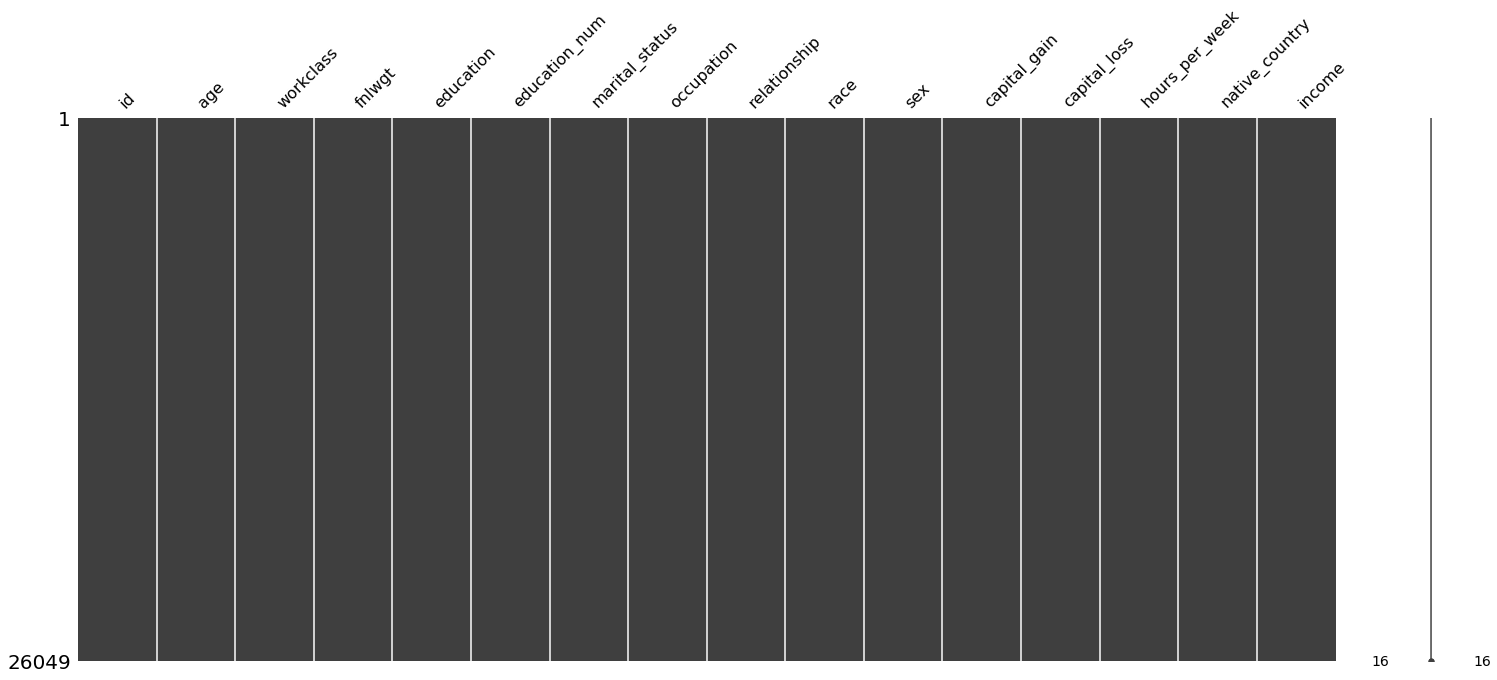

In [6]:
msno.matrix(train_df)

In [7]:
train_df.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

'id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'

In [8]:
train_df['workclass'].value_counts()

Private             18123
Self-emp-not-inc     2030
Local-gov            1692
?                    1502
State-gov            1043
Self-emp-inc          877
Federal-gov           765
Without-pay            11
Never-worked            6
Name: workclass, dtype: int64

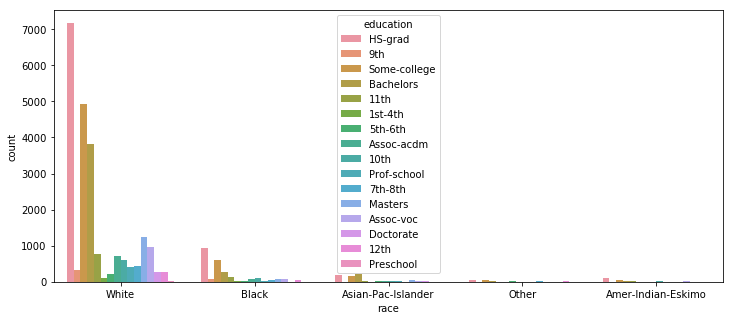

In [9]:
fig, ax = plt.subplots(1,1, figsize= (12, 5))
sns.countplot(data=train_df, x='race', ax = ax, hue='education')
plt.show()

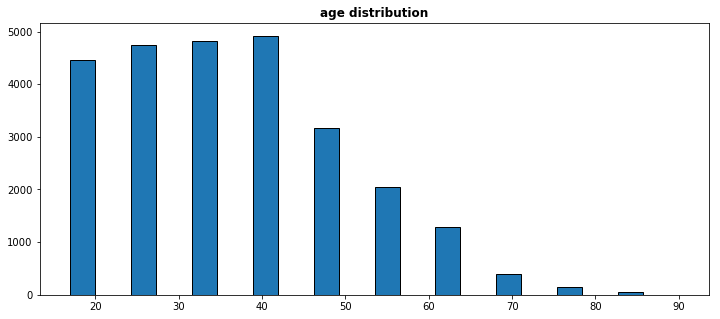

In [10]:
fig, ax = plt.subplots(1,1, figsize= (12, 5))

ax.hist(train_df['age'], width = 3, edgecolor = 'black')
ax.set_title('age distribution', fontweight = 'bold')

plt.show()

C:\Users\heegon\anaconda3\envs\pytorch\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\heegon\anaconda3\envs\pytorch\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\heegon\anaconda3\envs\pytorch\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


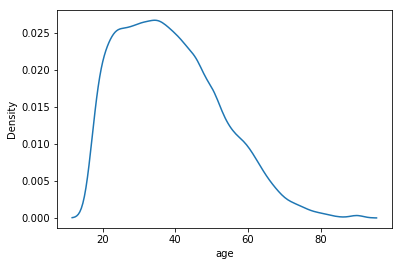

In [11]:
sns.kdeplot(data=train_df, x='age')

In [12]:
train_df['income'] = (train_df['income'] == '>50K').astype(int)

In [13]:
train_df.groupby(['race', 'sex'])[['income']].mean().style.background_gradient(cmap = 'Purples')

In [14]:
pd.pivot_table(train_df, columns='sex', index='race', values='income', aggfunc='mean')

sex,Female,Male
race,,
Amer-Indian-Eskimo,0.102273,0.120482
Asian-Pac-Islander,0.125926,0.341509
Black,0.051682,0.190135
Other,0.047059,0.117647
White,0.122085,0.317846


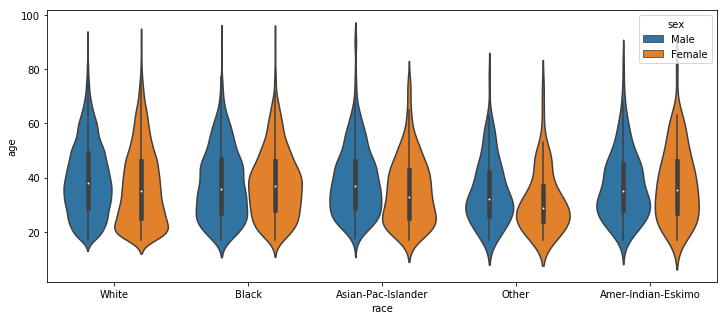

In [15]:
fig, ax = plt.subplots(1, 1, figsize= (12,5))
#sns.boxplot(data=train_df, x='race', y='age', ax = ax, hue = 'sex')

sns.violinplot(data=train_df, x='race', y='age', ax = ax, hue = 'sex')


In [16]:
train_df.corr().style.background_gradient(cmap='coolwarm')

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
id,1.000000,0.007866,-0.001191,0.002309,0.007228,-0.002553,0.005749,0.004350
age,0.007866,1.000000,-0.076618,0.040107,0.077768,0.057875,0.066038,0.229292
fnlwgt,-0.001191,-0.076618,1.000000,-0.046377,0.000953,-0.008689,-0.020064,-0.007500
education_num,0.002309,0.040107,-0.046377,1.000000,0.119382,0.074813,0.146063,0.334582
capital_gain,0.007228,0.077768,0.000953,0.119382,1.000000,-0.032030,0.080543,0.225296
capital_loss,-0.002553,0.057875,-0.008689,0.074813,-0.032030,1.000000,0.054957,0.152537
hours_per_week,0.005749,0.066038,-0.020064,0.146063,0.080543,0.054957,1.000000,0.233726
income,0.004350,0.229292,-0.007500,0.334582,0.225296,0.152537,0.233726,1.000000


In [17]:
corr = train_df.corr()

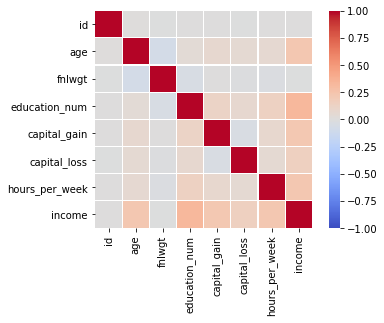

In [18]:
sns.heatmap(corr, square=True, linecolor='white', linewidth=0.1, cmap='coolwarm', vmax=1.0, vmin=-1.0)